In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#KHAI BAO THU VIEN
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [4]:
train_data = '/content/drive/MyDrive/AI/Go/TRAIN'
test_data =  '/content/drive/MyDrive/AI/Go/TEST'
val_data  =  '/content/drive/MyDrive/AI/Go/TEST'

In [5]:
from keras.engine.data_adapter import train_validation_split
data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_input = data_scale.flow_from_directory(train_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
train_input = data_scale.flow_from_directory(test_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")

Found 600 images belonging to 15 classes.
Found 600 images belonging to 15 classes.
Found 600 images belonging to 15 classes.


In [6]:
class_name = ['Anh_dao','Bach_dang_nk','Bach_xanh','Beech','Bo_de','Cam_lai','Cao_su','Cho_chi','Dang_huong','Lat_hoa','Lim','Mit_mat','Que','Soi','Xoan_ta']

In [7]:
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print("Tổng cộng các loại gỗ: ",train_input.num_classes)

labels:  ['Anh_dao', 'Bach_dang_nk', 'Bach_xanh', 'Beech', 'Bo_de', 'Cam_lai', 'Cao_su', 'Cho_chi', 'Dang_huong', 'Lat_hoa', 'Lim', 'Mit_mat', 'Que', 'Soi', 'Xoan_ta']
match class:  {'Anh_dao': 0, 'Bach_dang_nk': 1, 'Bach_xanh': 2, 'Beech': 3, 'Bo_de': 4, 'Cam_lai': 5, 'Cao_su': 6, 'Cho_chi': 7, 'Dang_huong': 8, 'Lat_hoa': 9, 'Lim': 10, 'Mit_mat': 11, 'Que': 12, 'Soi': 13, 'Xoan_ta': 14}
Tổng cộng các loại gỗ:  15


In [8]:
#XÂY DỰNG MODEL CNN
model=Sequential()

#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(15,activation='softmax'))  #15 class_name
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [11]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
money_train = model.fit(train_input,batch_size=30,epochs=100,verbose=1,validation_data=val_input)

Epoch 1/100
19/19 [==============================] - 168s 9s/step - loss: 4.2118 - accuracy: 0.0700 - val_loss: 2.7046 - val_accuracy: 0.0667
Epoch 2/100
19/19 [==============================] - 71s 4s/step - loss: 2.7013 - accuracy: 0.0800 - val_loss: 2.6862 - val_accuracy: 0.1583
Epoch 3/100
19/19 [==============================] - 72s 4s/step - loss: 2.6499 - accuracy: 0.1150 - val_loss: 2.5756 - val_accuracy: 0.1667
Epoch 4/100
19/19 [==============================] - 71s 4s/step - loss: 2.5645 - accuracy: 0.1117 - val_loss: 2.5134 - val_accuracy: 0.1550
Epoch 5/100
19/19 [==============================] - 71s 4s/step - loss: 2.4641 - accuracy: 0.1550 - val_loss: 2.3152 - val_accuracy: 0.1550
Epoch 6/100
19/19 [==============================] - 71s 4s/step - loss: 2.3355 - accuracy: 0.1633 - val_loss: 2.2535 - val_accuracy: 0.2983
Epoch 7/100
19/19 [==============================] - 71s 4s/step - loss: 2.2356 - accuracy: 0.1933 - val_loss: 2.1163 - val_accuracy: 0.2367
Epoch 8/100


In [13]:
model.save('Wood.h5')

array([0])

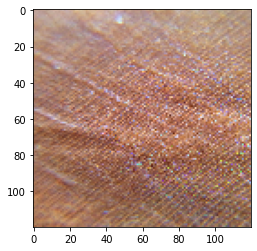

In [28]:
pic = image.load_img('/content/drive/MyDrive/AI/Anh_dao/50.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [29]:
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Loai go: Anh_dao")
if guess[0]==1:
  print("Loai go: Bach_dang_nk")
if guess[0]==2:
  print("Loai go: Bach_xanh")
if guess[0]==3:
  print("Loai go: Beech")
if guess[0]==4:
  print("Loai go: Bo_de")
if guess[0]==5:
  print("Loai go: Cam_lai")
if guess[0]==6:
  print("Loai go: Cao_su")
if guess[0]==7:
  print("Loai go: Cho_chi")
if guess[0]==8:
  print("Loai go: Dang_huong")
if guess[0]==9:
  print("Loai go: Lat_hoa")
if guess[0]==10:
  print("Loai go: Lim")
if guess[0]==11:
  print("Loai go: Mit_mat")
if guess[0]==12:
  print("Loai go: Que")
if guess[0]==13:
  print("Loai go: Soi")
if guess[0]==14:
  print("Loai go: Xoan_ta")

Loai go: Anh_dao


Loai go: Bach_dang_nk


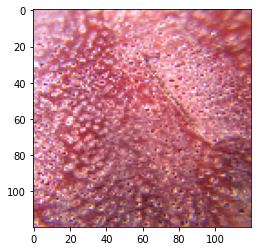

In [30]:
pic = image.load_img('/content/drive/MyDrive/AI/Bach_dang_nk/1067.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Loai go: Anh_dao")
if guess[0]==1:
  print("Loai go: Bach_dang_nk")
if guess[0]==2:
  print("Loai go: Bach_xanh")
if guess[0]==3:
  print("Loai go: Beech")
if guess[0]==4:
  print("Loai go: Bo_de")
if guess[0]==5:
  print("Loai go: Cam_lai")
if guess[0]==6:
  print("Loai go: Cao_su")
if guess[0]==7:
  print("Loai go: Cho_chi")
if guess[0]==8:
  print("Loai go: Dang_huong")
if guess[0]==9:
  print("Loai go: Lat_hoa")
if guess[0]==10:
  print("Loai go: Lim")
if guess[0]==11:
  print("Loai go: Mit_mat")
if guess[0]==12:
  print("Loai go: Que")
if guess[0]==13:
  print("Loai go: Soi")
if guess[0]==14:
  print("Loai go: Xoan_ta")

Loai go: Bach_xanh


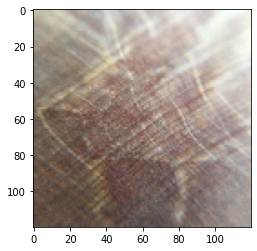

In [31]:
pic = image.load_img('/content/drive/MyDrive/AI/Bach_xanh/2206.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Loai go: Anh_dao")
if guess[0]==1:
  print("Loai go: Bach_dang_nk")
if guess[0]==2:
  print("Loai go: Bach_xanh")
if guess[0]==3:
  print("Loai go: Beech")
if guess[0]==4:
  print("Loai go: Bo_de")
if guess[0]==5:
  print("Loai go: Cam_lai")
if guess[0]==6:
  print("Loai go: Cao_su")
if guess[0]==7:
  print("Loai go: Cho_chi")
if guess[0]==8:
  print("Loai go: Dang_huong")
if guess[0]==9:
  print("Loai go: Lat_hoa")
if guess[0]==10:
  print("Loai go: Lim")
if guess[0]==11:
  print("Loai go: Mit_mat")
if guess[0]==12:
  print("Loai go: Que")
if guess[0]==13:
  print("Loai go: Soi")
if guess[0]==14:
  print("Loai go: Xoan_ta")